# EDA On Ashrae Energy Consumption Dataset 

Analyzing an interesting dataset found on kaggle from ASHARE which stands for American Society of Heating, Refrigeratinga nd Air-Conditioning Engineering

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We utilize the power of the OpenDatasets library to download the dataset from Kaggle. By leveraging this library, we can easily access and acquire the necessary dataset for our analysis

In [6]:
!pip install humanize --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install opendatasets --upgrade --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/competitions/ashrae-energy-prediction/data'

In [ ]:
import opendatasets as od
od.download(dataset_url) #run this to download the dataset

The dataset has been downloaded and extracted.

In [19]:
# Change this
data_dir = './ashrae-energy-prediction'

In [20]:
import os
os.listdir(data_dir)

['building_metadata.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'weather_test.csv',
 'weather_train.csv']

## Data Description

As obsereved there are 6 different csv files in the downloaded zip file 

The given data description in the kaggle website:

train.csv
- building_id - Foreign key for the building metadata.
- meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
- timestamp - When the measurement was taken
- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.

building_meta.csv
- site_id - Foreign key for the weather files.
- building_id - Foreign key for training.csv
- primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
- square_feet - Gross floor area of the building
- year_built - Year building was opened
- floor_count - Number of floors of the building

weather_[train/test].csv
Weather data from a meteorological station as close as possible to the site.

- site_id
- air_temperature - Degrees Celsius
- timestamp - When the measurement was taken
- cloud_coverage - Portion of the sky covered in clouds, in oktas
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second

Let us save and upload our work to Jovian before continuing.

In [13]:
project_name = "EDA_Ashrae_Energy_consumption" # change this (use lowercase letters and hyphens only)

In [14]:
!pip install jovian --upgrade -q


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project=project_name)

## Loading the CSV using Pandas

Lets use pandas library to load only the required unprocesssed data into different variables for our analysis

In [46]:
import pandas as pd

# Read the train.csv file
train_df = pd.read_csv('./ashrae-energy-prediction/train.csv',parse_dates=['timestamp'])

weather_train_df= pd.read_csv('./ashrae-energy-prediction/weather_train.csv',parse_dates=['timestamp'])

meta_df = pd.read_csv('./ashrae-energy-prediction/building_metadata.csv',parse_dates=['year_built'])

The parse_dates parameter in the pd.read_csv() function is used to specify which columns should be parsed as dates during the reading of the CSV file. 

Selected the columns that must be parsed as dates by going through the data descrption

## Exploring the Data Frame 

Lets take a look at dffierent columns in different csv's 

In [25]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          int64         
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 616.9 MB


In [28]:
for column in train_df.columns:
    unique_values = train_df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'building_id': 1449
Unique values in column 'meter': 4
Unique values in column 'timestamp': 8784
Unique values in column 'meter_reading': 1688175


In [24]:
train_df.describe()

,building_id,meter,timestamp,meter_reading
count,2.021610e+07,2.021610e+07,20216100,2.021610e+07
mean,7.992780e+02,6.624412e-01,2016-07-03 22:59:40.301601792,2.117121e+03
min,0.000000e+00,0.000000e+00,2016-01-01 00:00:00,0.000000e+00
25%,3.930000e+02,0.000000e+00,2016-04-05 21:00:00,1.830000e+01
50%,8.950000e+02,0.000000e+00,2016-07-04 17:00:00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2016-10-02 22:00:00,2.679840e+02
max,1.448000e+03,3.000000e+00,2016-12-31 23:00:00,2.190470e+07
std,4.269133e+02,9.309921e-01,NaN,1.532356e+05


**train_df**
After taking a look at the train_df dataset we can can observe the following things :

- There are 4 columns in the dataset where the building_id is int64 datatype and has 1149 unique values
    -  Where the building_id is int64 datatype and has 1149 unique values (**foreign key** for meta_df) given in the dataset description
    -  The meter column is also of int64 datatype and has 4 unique values
    -  The timestamp column is of datetime64[ns]
    - Similarly the meter_reading column is of float64.


Now similarly lets check for the weather_df column too:


In [29]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [36]:
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   cloud_coverage      70600 non-null   float64       
 4   dew_temperature     139660 non-null  float64       
 5   precip_depth_1_hr   89484 non-null   float64       
 6   sea_level_pressure  129155 non-null  float64       
 7   wind_direction      133505 non-null  float64       
 8   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


In [31]:
for column in weather_train_df.columns:
    unique_values = weather_train_df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'site_id': 16
Unique values in column 'timestamp': 8784
Unique values in column 'air_temperature': 619
Unique values in column 'cloud_coverage': 10
Unique values in column 'dew_temperature': 522
Unique values in column 'precip_depth_1_hr': 128
Unique values in column 'sea_level_pressure': 709
Unique values in column 'wind_direction': 43
Unique values in column 'wind_speed': 58


In [34]:
weather_train_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


**weather_train_df**

Similarly there are 8 columns in the weather_train_df with 139772 rows 

- The site_id has 16 unique values and is of int 64
- The air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction and wind_speed is of float64
- And the timestamp is of datetime64[ns]


And finally lets take a look at meta_df

In [37]:
meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008-01-01,NaN
1,0,1,Education,2720,2004-01-01,NaN
2,0,2,Education,5376,1991-01-01,NaN
3,0,3,Education,23685,2002-01-01,NaN
4,0,4,Education,116607,1975-01-01,NaN


In [38]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   site_id      1449 non-null   int64         
 1   building_id  1449 non-null   int64         
 2   primary_use  1449 non-null   object        
 3   square_feet  1449 non-null   int64         
 4   year_built   675 non-null    datetime64[ns]
 5   floor_count  355 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 68.0+ KB


In [42]:
meta_df.sample(3)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
707,5,707,Education,11270,1976-01-01,1.0
946,9,946,Education,177216,NaT,NaN
903,9,903,Education,275793,NaT,NaN


In [43]:
meta_df['primary_use'].nunique()

16

In [41]:
meta_df.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675,355.000000
mean,6.952381,724.000000,92111.776398,1967-12-16 15:40:48,3.740845
min,0.000000,0.000000,283.000000,1900-01-01 00:00:00,1.000000
25%,3.000000,362.000000,23012.000000,1949-01-01 00:00:00,1.000000
50%,5.000000,724.000000,57673.000000,1970-01-01 00:00:00,3.000000
75%,13.000000,1086.000000,115676.000000,1995-01-01 00:00:00,5.000000
max,15.000000,1448.000000,875000.000000,2017-01-01 00:00:00,26.000000
std,5.003432,418.434583,110769.950997,NaN,3.333683


**meta_df**

This is dataset consists of 6 columns with 1448 rows 

- The site_id, building_id and square_feet is of int64 datatype  (site_id is a **foreign key** for weather_train_df) given in the dataset description
- The primary use is made up of 16 categories
- year_built is of float64 and timestamp just like in other dataset is of datetime64[ns]

## Data Preparation and Cleaning

**Data Preperation** 

Lets change the datatypes of columns so it would reduce the memory usage.

Before reducing the datatypes lets check the overall memory usage of every single dataframe


In [47]:
from humanize import naturalsize

memory_usage = [naturalsize(df.memory_usage().sum()) for df in [train_df, weather_train_df, meta_df]]
print(memory_usage)

['646.9 MB', '10.1 MB', '69.7 kB']


Thats quite high lets reduce the datatypes and then see how much of a difference does it make.

In [48]:
train_df=train_df.astype({'building_id':'int16','meter':'int8','meter_reading':'float32'})

In [49]:
weather_train_df=weather_train_df.astype({'site_id':'int8','air_temperature':'float16',
                       'cloud_coverage':'float16','dew_temperature':'float16',
                       'precip_depth_1_hr':'float16','sea_level_pressure':'float16'
                       ,'wind_speed':'float16','wind_direction':'float16'
                       })

In [50]:
meta_df=meta_df.astype({'site_id':'int8','building_id':'int16',
                       'square_feet':'int16'
                       })

In [51]:
from humanize import naturalsize

memory_usage = [naturalsize(df.memory_usage().sum()) for df in [train_df, weather_train_df, meta_df]]
print(memory_usage)


['303.2 MB', '3.2 MB', '42.1 kB']


That has significantly reduced. Great! 

## Exploratory Analysis

Lets Plot differnt graphs using each data frame and see what visualze what correlation does it have between one another!!

In [11]:
train_df.corr()

,building_id,meter,timestamp,meter_reading
building_id,1.000000,0.222268,0.014435,0.008761
meter,0.222268,1.000000,0.005264,0.017672
timestamp,0.014435,0.005264,1.000000,-0.006679
meter_reading,0.008761,0.017672,-0.006679,1.000000


In [15]:
train_df.isnull().sum() #checking for missing values in the dataset 

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

Since there is no missing values lets visualize the total energy consumed with respect to the date

In [19]:
max_date=train_df['timestamp'].max()
min_date=train_df['timestamp'].min()
print('The {} is the max date and {} is the min date'.format (max_date,min_date))

The 2016-12-31 23:00:00 is the max date and 2016-01-01 00:00:00 is the min date


Its clear that the data consists of time period for only year 2016

Lets see the total energy consumed in the year 2016

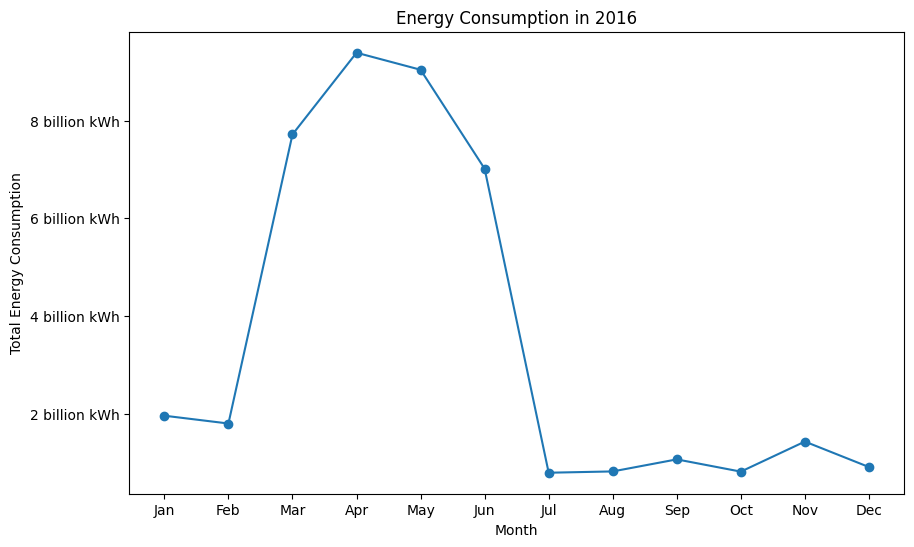

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
train_df['month'] = train_df['timestamp'].dt.month


monthly_energy = train_df.groupby('month')['meter_reading'].sum()


plt.figure(figsize=(10, 6))
plt.plot(monthly_energy.index, monthly_energy, marker='o')


plt.xlabel('Month')
plt.ylabel('Total Energy Consumption')
plt.title('Energy Consumption in 2016')

month_names = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS').strftime('%b')
plt.xticks(monthly_energy.index, month_names)

# Format the y-axis labels as billion kWh or million kWh
def energy_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.0f} billion kWh'
    elif x >= 1e6:
        return f'{x / 1e6:.0f} million kWh'
    else:
        return f'{x / 1e3:.0f} thousand kWh'

formatter = FuncFormatter(energy_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

It can be noticed that in between the month of FEBRUARY to JULY has a hike in energy consumption compared to other months

### Lets move on to weather_train_df

In [12]:
weather_train_df.corr()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,1.000000,0.001924,-0.262746,0.021003,-0.204501,0.020269,-0.009193,0.045021,0.027688
timestamp,0.001924,1.000000,0.184521,-0.017758,0.240282,0.003878,0.131250,-0.029262,-0.081549
air_temperature,-0.262746,0.184521,1.000000,0.010149,0.790386,-0.010719,-0.209317,-0.093240,-0.056743
cloud_coverage,0.021003,-0.017758,0.010149,1.000000,0.183606,0.122253,-0.158361,0.052560,0.294019
dew_temperature,-0.204501,0.240282,0.790386,0.183606,1.000000,0.065881,-0.168759,-0.149033,-0.096836
precip_depth_1_hr,0.020269,0.003878,-0.010719,0.122253,0.065881,1.000000,-0.081343,-0.013161,0.035023
sea_level_pressure,-0.009193,0.131250,-0.209317,-0.158361,-0.168759,-0.081343,1.000000,-0.103002,-0.251602
wind_direction,0.045021,-0.029262,-0.093240,0.052560,-0.149033,-0.013161,-0.103002,1.000000,0.354690
wind_speed,0.027688,-0.081549,-0.056743,0.294019,-0.096836,0.035023,-0.251602,0.354690,1.000000


In [23]:
weather_train_df.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

There is alot of missing values but lets deal with it once we merge the all the dataset into one

Lets check for the mean temperature rank by hour for different site_id

In [24]:
#lets create a hourly based 
temp_df=weather_train_df[['site_id','timestamp','air_temperature']]
temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\2007883584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')


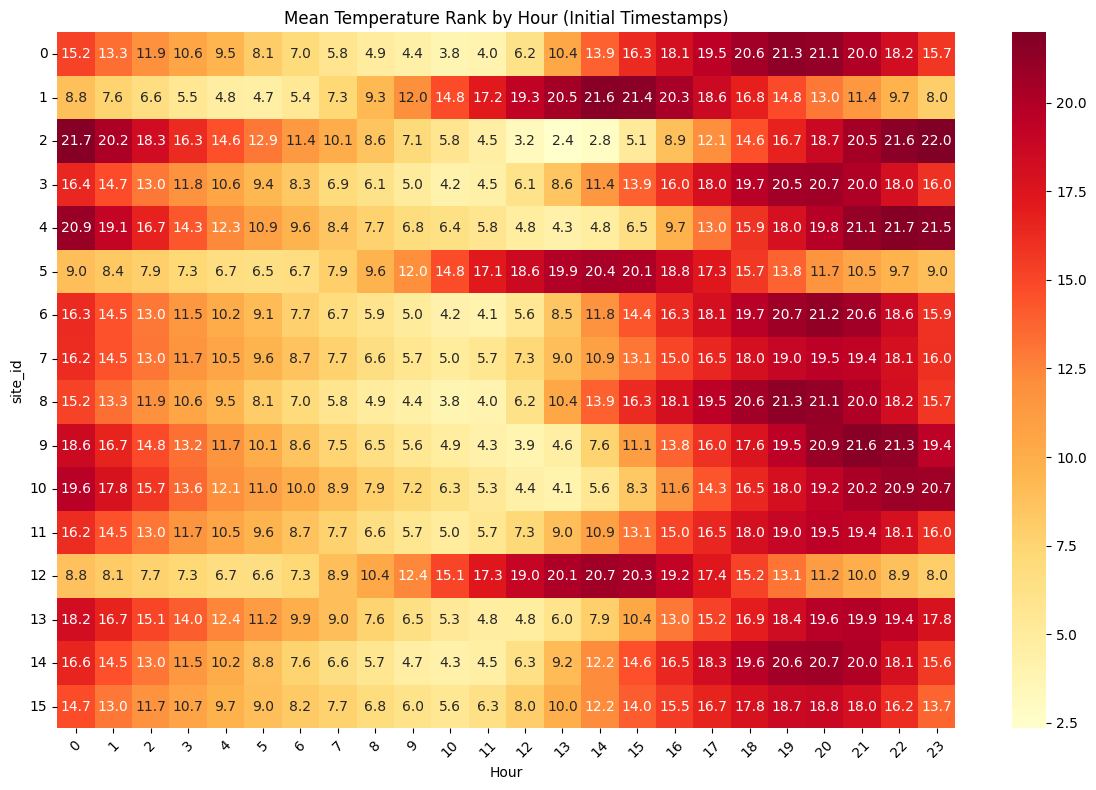

In [25]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_2d, cmap='YlOrRd', annot=True, fmt=".1f", cbar=True)
plt.xlabel('Hour')
plt.ylabel('site_id')
plt.title('Mean Temperature Rank by Hour (Initial Timestamps)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

As we observe the timestamp dont seem to be alligned except for site_id 12,5 and 1 as that is how the typical temperature would be in a day from 9'o clock to 1'o clock being the hotest 

Keeping that as reference lets align the temperatre for the rest of the site_id

#### Custom timestamp allignment function

(Credits: https://www.kaggle.com/code/frednavruzov/aligning-temperature-timestamp/notebook)

In [29]:
import numpy as np
def time_alignment(df):
    temp_df=df[['site_id','timestamp','air_temperature']]
    

    temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
    
    # create 2D dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
    df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)
    

    df_2d = df_2d / df_2d.max(axis=1).values.reshape((-1,1))
    

    site_ids_argmax_maxtemp=pd.Series(np.argmax(df_2d.values,axis=1)).sort_values().index
  
    site_ids_offsets= pd.Series(df_2d.values.argmax(axis=1) - 14)

    df_2d=df_2d.iloc[site_ids_argmax_maxtemp]
    temp_df['offset'] = temp_df.site_id.map(site_ids_offsets)

    temp_df['timestamp_aligned'] = (temp_df.timestamp - pd.to_timedelta(temp_df.offset, unit='H'))
 
    df['timestamp']=temp_df['timestamp_aligned']
    return df 

In [30]:
time_alignment(weather_train_df) #aligning the timestamp

C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\1966078300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\1966078300.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['offset'] = temp_df.site_id.map(site_ids_offsets)
C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\1966078300.py:22: SettingWit

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2015-12-31 19:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2015-12-31 20:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2015-12-31 21:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2015-12-31 22:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2015-12-31 23:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 13:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 14:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 15:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 16:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


Lets run the heatmap code again and check the bhevaiour of the graph 

In [31]:
#lets create a hourly based 
temp_df=weather_train_df[['site_id','timestamp','air_temperature']]
temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\2007883584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')


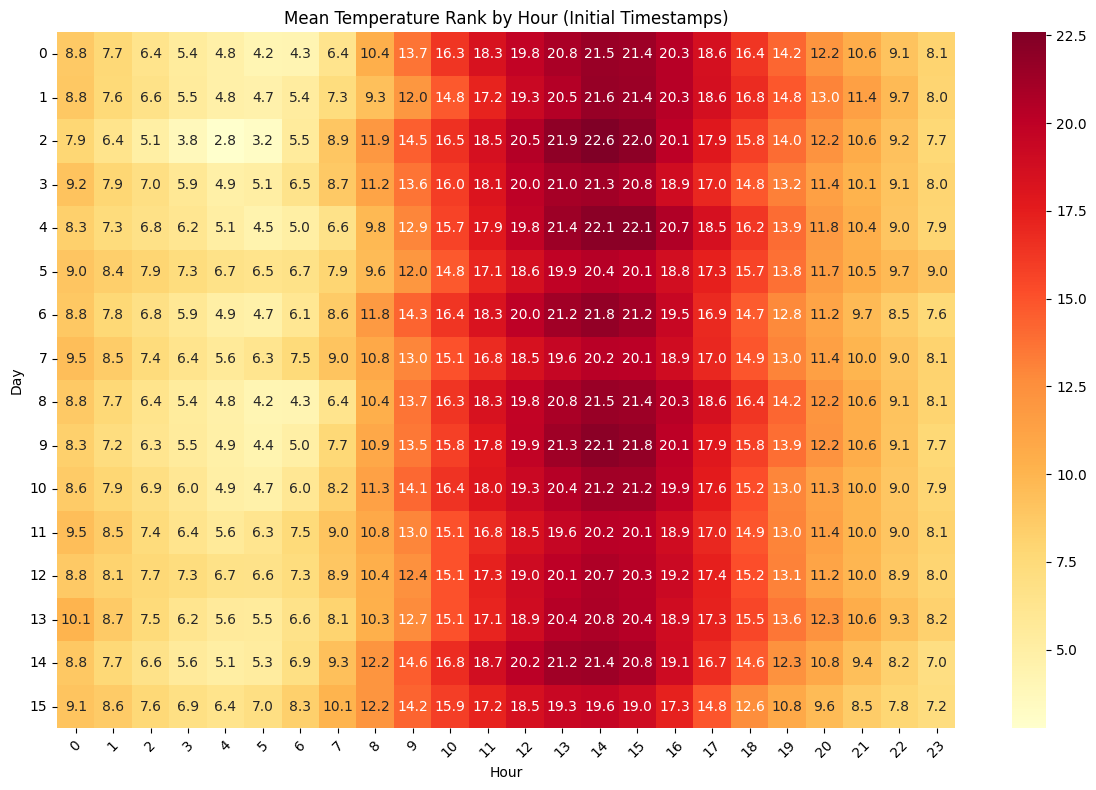

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_2d, cmap='YlOrRd', annot=True, fmt=".1f", cbar=True)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Mean Temperature Rank by Hour (Initial Timestamps)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
del temp_df #reduce memory usage by removing temperory df

That looks better from this is what it would look like through out a typical day !!

### Next lets vizualize whats in meta_df dataset

In [33]:
meta_df.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

Lets see how many buildings are there in each site_id

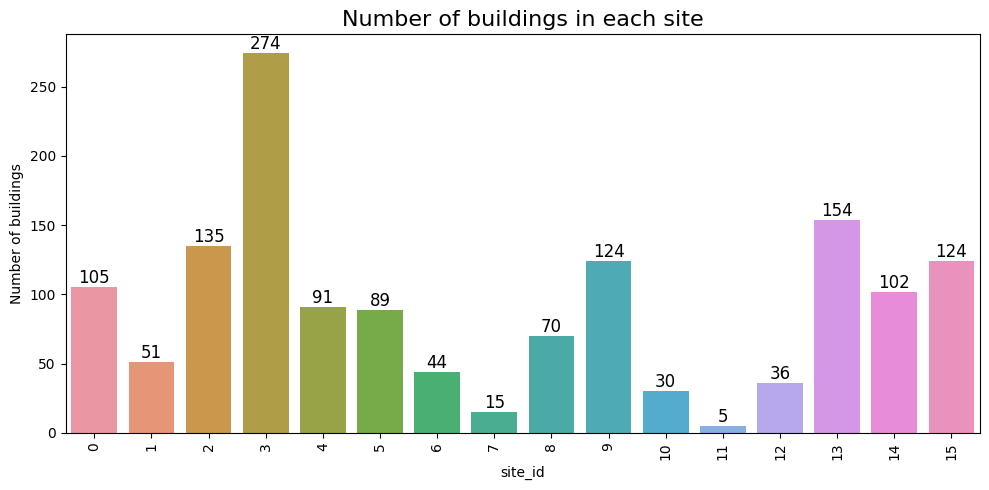

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(data=meta_df, x='site_id', ax=ax)

for p in ax.patches:
    height = int(p.get_height())  # Convert the count to an integer
    ax.annotate(height, (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=12)


ax.set_xlabel('site_id')
ax.set_ylabel('Number of buildings')
ax.set_title('Number of buildings in each site', fontsize=16)


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

site_id 3 has the most number of buildings and next being site_id 13 and 2

Lets visualize the distribution of different columns in meta_df

C:\Users\asif.abbas_ucamind\AppData\Local\Temp\ipykernel_1292\2588655391.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


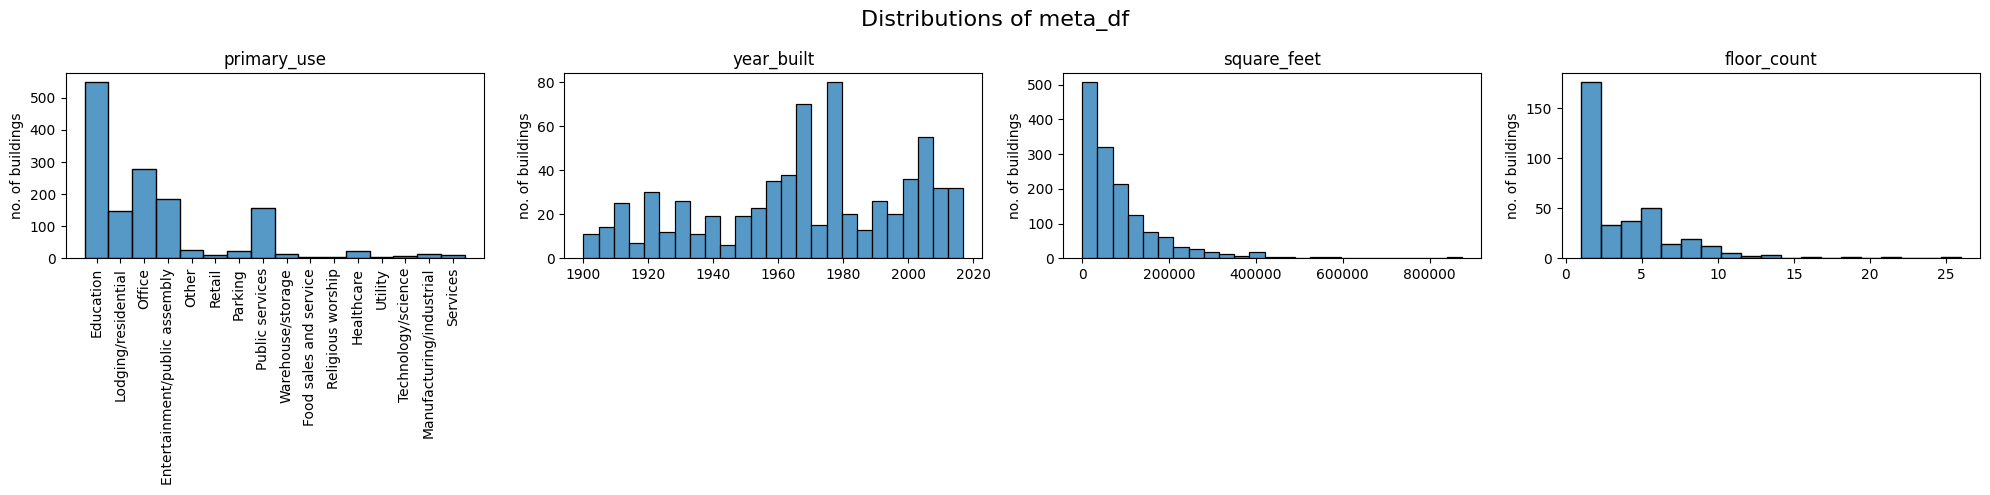

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))


for i, col in enumerate(['primary_use', 'year_built', 'square_feet', 'floor_count']):
    if col == 'primary_use':
        sns.histplot(data=meta_df, x=col, ax=axes[i], bins=min(25, len(meta_df[col].unique())))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    else:
        sns.histplot(data=meta_df, x=col, ax=axes[i], bins=min(25, len(meta_df[col].unique())))
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('no. of buildings')


fig.suptitle('Distributions of meta_df', fontsize=16)


plt.tight_layout()


plt.show()


Observations from the visualization above:

 - The education category in primary_use has the most number of buildings
 - Most of the buildings were built after 1950s
 - Most of the buildings are between 0-400000 square feet
 - and most of the buildings are not high rise and have a max of upto 10 floors in average

## Merging into one single dataframe

Lets merge 3 datasets into one single dataframe so we can correlate one with the other and visualize with ease

In [52]:
merged_df = train_df.merge(meta_df, on='building_id', how='left')
df= merged_df.merge(weather_train_df,on=['site_id','timestamp'],how='left')

In [53]:
del merged_df,train_df,meta_df,weather_train_df #Remove unused variables to free up memeory

In [43]:
df.sample(3)

,building_id,meter,timestamp,meter_reading,month,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
455326,316,0,2016-01-09 06:00:00,22.890,1,3,Public services,78550,NaT,NaN,5.6,8.0,4.4,-1.0,1020.2,360.0,1.5
18441312,1121,0,2016-11-30 03:00:00,125.851,11,13,Education,85732,NaT,NaN,2.2,NaN,0.6,0.0,997.6,290.0,2.1
6909363,529,0,2016-05-08 21:00:00,21.390,5,3,Public services,14519,1908-01-01,NaN,16.1,6.0,0.6,0.0,1015.4,330.0,3.1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float32       
 4   site_id             int8          
 5   primary_use         object        
 6   square_feet         int16         
 7   year_built          datetime64[ns]
 8   floor_count         float64       
 9   air_temperature     float16       
 10  cloud_coverage      float16       
 11  dew_temperature     float16       
 12  precip_depth_1_hr   float16       
 13  sea_level_pressure  float16       
 14  wind_direction      float16       
 15  wind_speed          float16       
dtypes: datetime64[ns](2), float16(7), float32(1), float64(1), int16(2), int8(2), object(1)
memory usage: 1.1+ GB


## Missing values 
The dataset has over 20 Million Rows alright now since we can see that the memory usage is above 1GB 
lets reduce it as much as possible by cleaning it further and taking care of the missing values

In [55]:
df.isna().sum()*100/len(df)

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
dtype: float64

In [56]:
median_year = df['year_built'].median() #filling the year missing values with the median value
df['year_built'].fillna(median_year, inplace=True)
df['cloud_coverage'].fillna(-1, inplace=True)#replacing the missing values in cloud_coverage with -1, here -1 will be considered as missing values where 0-9 is the different oktas value
# Convert object columns to categorical to save memeory usage
df['meter'] = df['meter'].astype('category')
df['primary_use'] = df['primary_use'].astype('category')

In [57]:
df.drop(['floor_count', 'precip_depth_1_hr', 'sea_level_pressure'], axis=1, inplace=True) #dropping the columns which is not useful

In [60]:
naturalsize(df.memory_usage().sum())

'748.0 MB'

In [61]:
df.isna().sum()*100/len(df)

building_id        0.000000
meter              0.000000
timestamp          0.000000
meter_reading      0.000000
site_id            0.000000
primary_use        0.000000
square_feet        0.000000
year_built         0.000000
air_temperature    0.478124
cloud_coverage     0.000000
dew_temperature    0.495348
wind_direction     7.167792
wind_speed         0.710701
dtype: float64

This look sufficient enough for the EDA

## Mapping meter code and converting kBTU to kWh

In [62]:
meter_labels = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
df['meter'] = df['meter'].map(meter_labels)
df.loc[df['site_id'] == 0, 'meter_reading'] *= 0.2931

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

- Since now the data has been cleaned and there are no missing values lets get into visualizations.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [78]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Q1** - What type of meter is mostly used ?

In [67]:
df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,wind_direction,wind_speed
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008-01-01,25.0,6.0,20.0,0.0,0.0
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004-01-01,25.0,6.0,20.0,0.0,0.0
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991-01-01,25.0,6.0,20.0,0.0,0.0
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002-01-01,25.0,6.0,20.0,0.0,0.0
4,4,electricity,2016-01-01,0.0,0,Education,-14465,1975-01-01,25.0,6.0,20.0,0.0,0.0


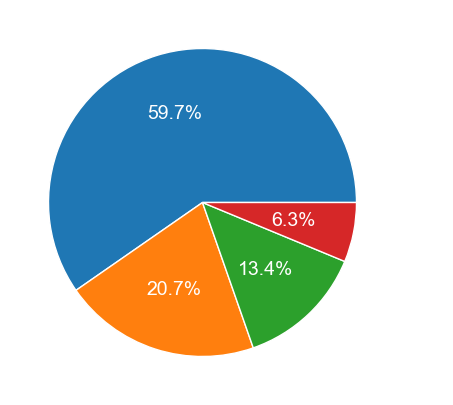

In [96]:
matplotlib.rcParams['text.color'] = 'white'
fig = plt.pie(df['meter'].value_counts().values, 
             labels=df['meter'].value_counts().index,autopct='%.01f%%',
             )

plt.show()

So the electricity type meter is mostly used in all the buildings as it is a necessary one.

**Q2** - What is the different temperature variation with respect to the time distribution in different site_id?

In [73]:
df['site_id'].nunique()

16

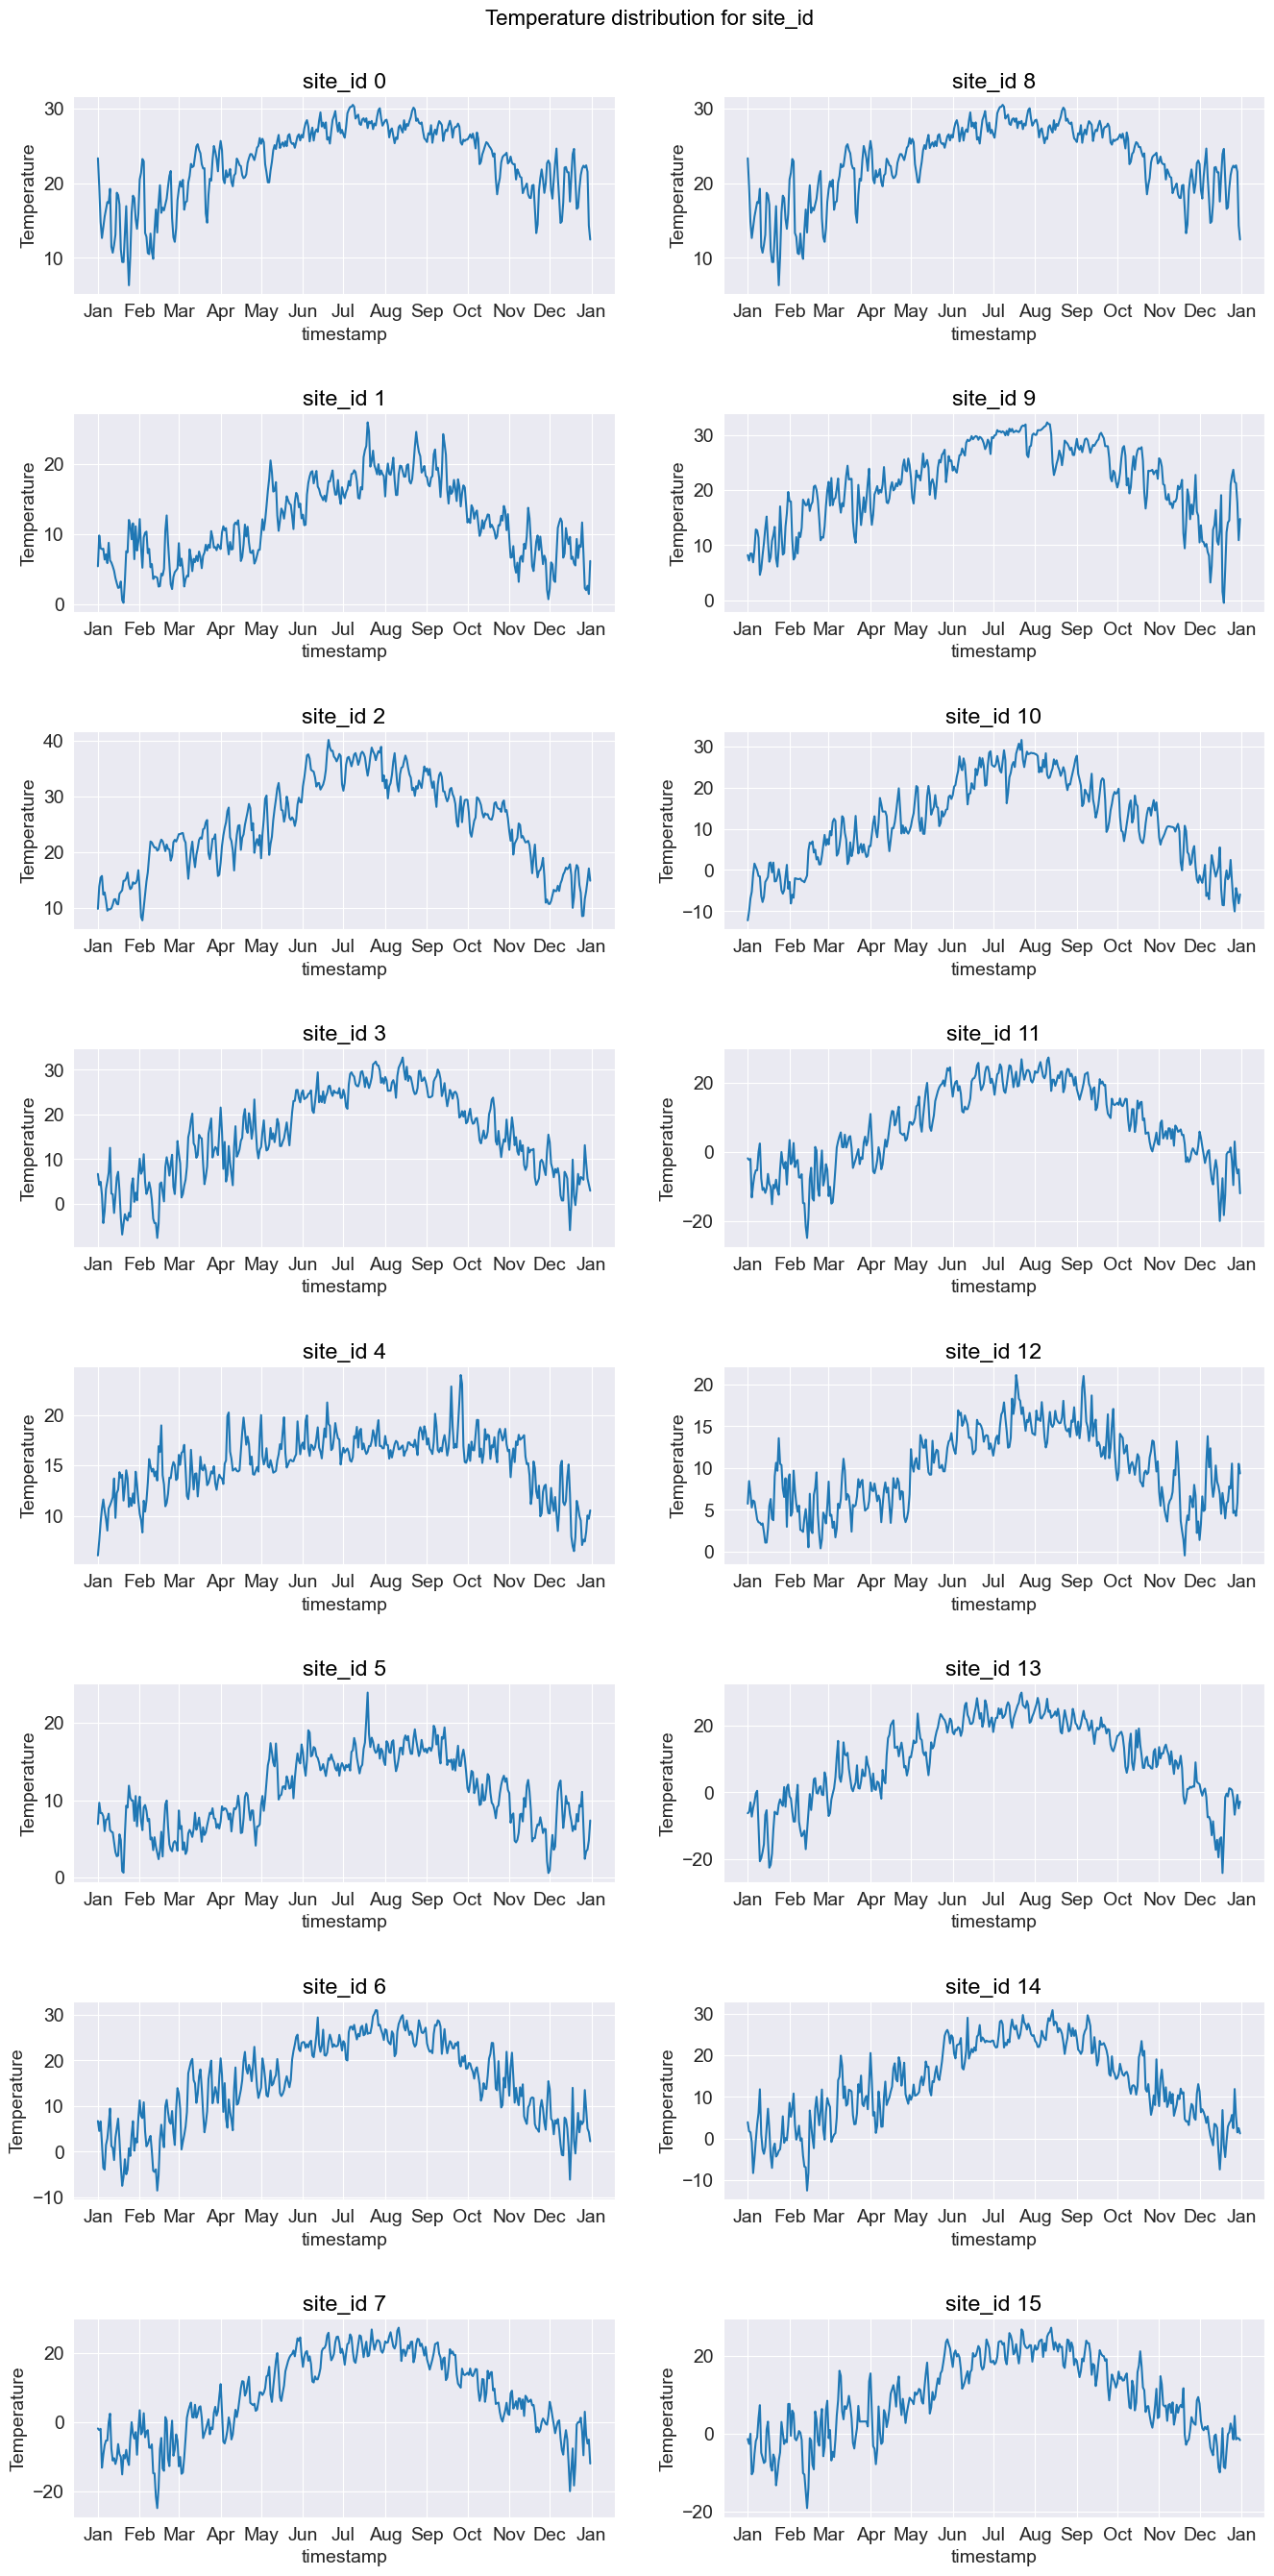

In [86]:
from matplotlib.dates import MonthLocator, DateFormatter
matplotlib.rcParams['text.color'] = 'black'

subset_df = df.loc[:, ['site_id', 'timestamp', 'air_temperature']].copy()

# Create the plot using the subset dataset
fig, ax = plt.subplots(8, 2, figsize=(16, 30))
fig.suptitle('Temperature distribution for site_id', fontsize=16)

for i in range(16):
    ax[i % 8][i // 8].xaxis.set_major_locator(MonthLocator())
    ax[i % 8][i // 8].xaxis.set_major_formatter(DateFormatter('%b'))
    sns.lineplot(
        data=subset_df[subset_df['site_id'] == i].set_index('timestamp').resample('D').mean()['air_temperature'],
        ax=ax[i % 8][i // 8]
    )
    ax[i % 8][i // 8].set_ylabel('Temperature')
    ax[i % 8][i // 8].set_title('site_id {}'.format(i))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, top=0.95)  # Increase or decrease the value as needed

plt.show()


The Temperature distribution is mostly similar for every site_id as the temperature hits the peak around july/august

**Q3** - How would the Energy Consumption in a week for different site_id would look like ?

In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp

df_subset = df[['site_id', 'timestamp', 'meter_reading']]

fig = sp.make_subplots(rows=8, cols=2, subplot_titles=[f"Site {site_id}" for site_id in range(16)])

desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, site_id in enumerate(range(16)):
    site_data = df_subset[df_subset['site_id'] == site_id].copy()  # Make a copy of the DataFrame
    
    site_data.loc[:, 'day_of_week'] = site_data['timestamp'].dt.strftime('%A')  # Use .loc to modify the DataFrame
    
    daily_data = site_data.groupby('day_of_week')['meter_reading'].mean()
    daily_data = daily_data.reindex(desired_order)
    
    trace = go.Scatter(x=daily_data.index, y=daily_data, mode='lines', name='Energy Consumption')
    
    fig.add_trace(trace, row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(height=1200, width=1200, title='Mean energy consumption in different site_id throughout the week', showlegend=False,title_x=0.5,)

fig.show()


We can observe that throughout the week most of the site_id has evenly distributed mean energy consumption climbing up on **sunday** and dropping again on **saturday** 

**Q4** - Is there a relation between building age and average energy consumed?

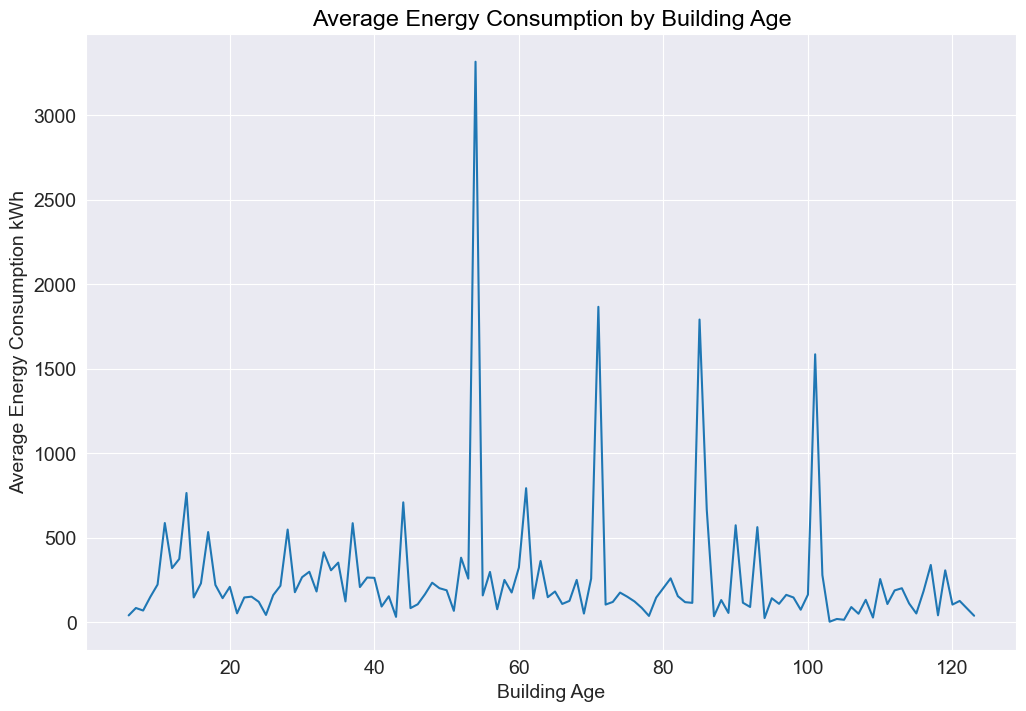

In [106]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Calculate the building age by subtracting the year of construction from the current year
df['building_age'] = current_year - pd.to_datetime(df['year_built']).dt.year

# Filter the DataFrame to include only necessary columns and drop missing values
df_subset = df[['building_age', 'meter_reading']]
# Calculate the average energy consumption by building age
avg_energy_consumption = df_subset.groupby('building_age')['meter_reading'].mean().reset_index()

# Create the line plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=avg_energy_consumption, x='building_age', y='meter_reading', ax=ax)

# Set the x-axis label
ax.set_xlabel('Building Age')

# Set the y-axis label
ax.set_ylabel('Average Energy Consumption kWh')

# Set the plot title
ax.set_title('Average Energy Consumption by Building Age')

# Show the plot
plt.show()

This visualization does not make sense as there could be an anomaly in the dataset, Lets find out what it is with the next visualization.

**Q5** - What is the Total energy consumed with respect to the building_id

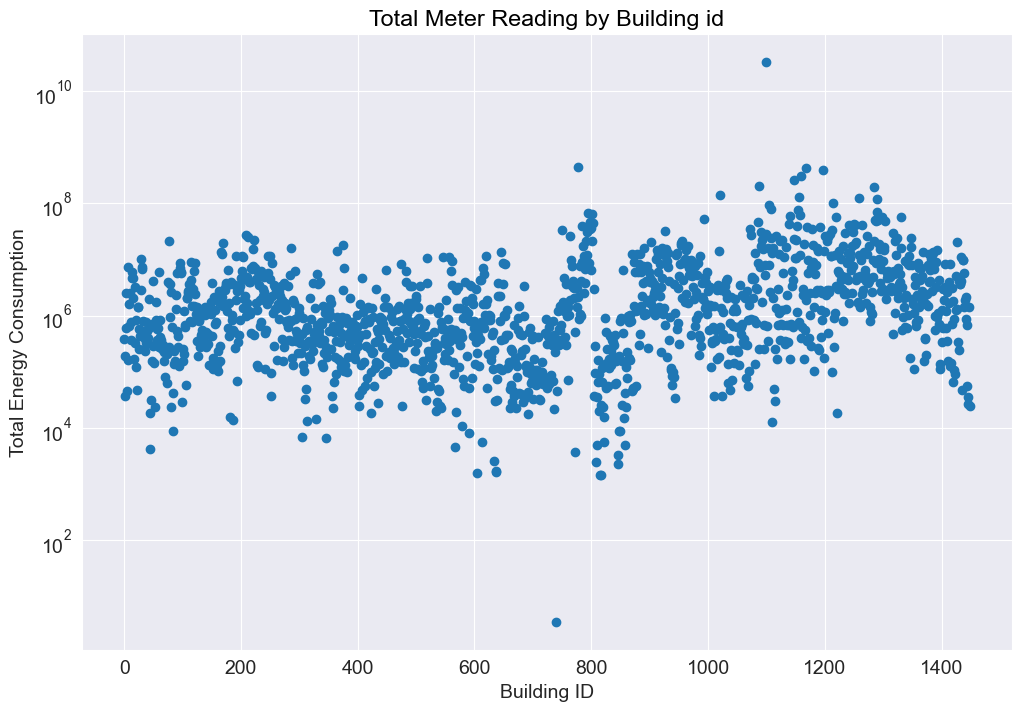

In [108]:
total_meter_reading = df.groupby('building_id')['meter_reading'].sum().reset_index()


plt.figure(figsize=(12, 8))
plt.scatter(total_meter_reading['building_id'], total_meter_reading['meter_reading'])
plt.xlabel('Building ID')
plt.ylabel('Total Energy Consumption')
plt.title('Total Meter Reading by Building id')
plt.yscale('log')  # Apply logarithmic scale to y-axis


plt.show()

From this graph it is very clear that most of the values lie between 10<sup>4</sup> to 10<sup>8</sup>, But there are two outliers lets find out what is the building_id of these two outliers 

In [99]:
total_meter_reading = df.groupby('building_id')['meter_reading'].sum().reset_index()


min_id = total_meter_reading['building_id'].iloc[total_meter_reading['meter_reading'].idxmin()]
max_id = total_meter_reading['building_id'].iloc[total_meter_reading['meter_reading'].idxmax()]


min_building = total_meter_reading[total_meter_reading['building_id'] == min_id]
max_building = total_meter_reading[total_meter_reading['building_id'] == max_id]


min_building_info = df[df['building_id'] == min_id]['primary_use'].iloc[0]
max_building_info = df[df['building_id'] == max_id]['primary_use'].iloc[0]

building_info = pd.DataFrame({
    'Building ID': [min_id, max_id],
    'Primary Use': [min_building_info, max_building_info],
    'Total Meter Reading': [min_building['meter_reading'].values[0], max_building['meter_reading'].values[0]]
})


print(building_info)

   Building ID Primary Use  Total Meter Reading
0          740   Education         3.513400e+00
1         1099   Education         3.350620e+10


The building_id 740 and 1099 are the outliers and we can observe that the primary use of both the outliers are Education so keeping that in mind we must carry on with the further analysis

In [101]:
df_filtered=df.copy() #creating a copy of dataset to not disturb the originial dataset

In [102]:
# Define the minimum and maximum building IDs
min_id = 740
max_id = 1099

# Filter the DataFrame to exclude the outliers
df_filtered = df_filtered[~df_filtered['building_id'].isin([min_id, max_id])]
df_filtered.reset_index()

# Print the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", df_filtered.shape)

Shape of filtered DataFrame: (20189750, 14)


Now lets plot the average energy consumption with respect to the building_id

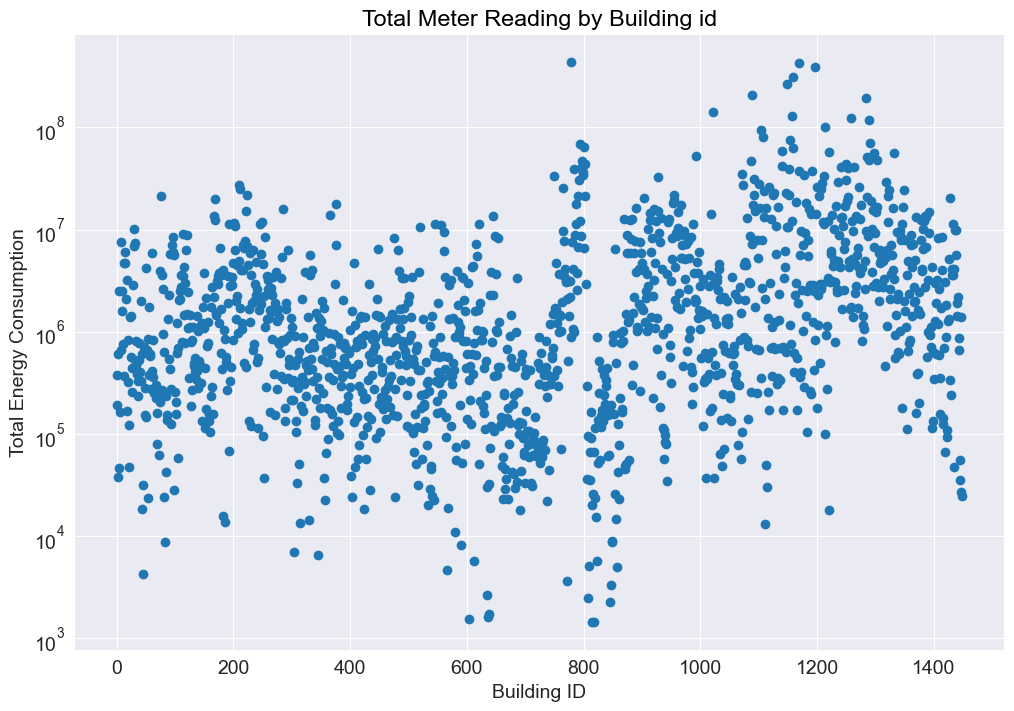

In [109]:
total_meter_reading = df_filtered.groupby('building_id')['meter_reading'].sum().reset_index()


plt.figure(figsize=(12, 8))
plt.scatter(total_meter_reading['building_id'], total_meter_reading['meter_reading'])
plt.xlabel('Building ID')
plt.ylabel('Total Energy Consumption')
plt.title('Total Meter Reading by Building id')
plt.yscale('log')  # Apply logarithmic scale to y-axis


plt.show()

That looks way well distributed and we can see that most of the building consume energy upto max 10<sup>8</sup>


Now lets take a look at the building age vs the average energy consumed 

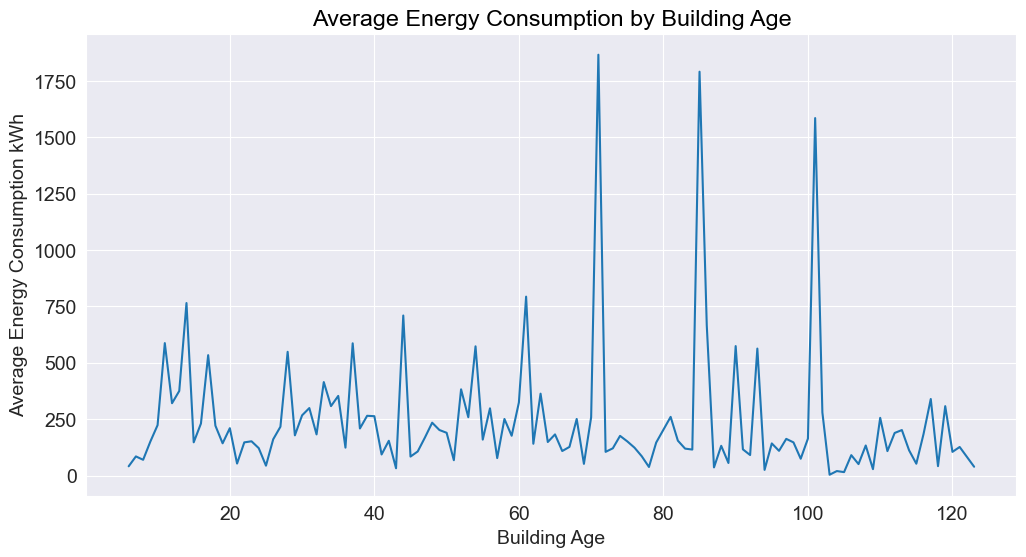

In [110]:

current_year = datetime.datetime.now().year


df_filtered['building_age'] = current_year - pd.to_datetime(df['year_built']).dt.year


df_subset = df_filtered[['building_age', 'meter_reading']]

avg_energy_consumption = df_subset.groupby('building_age')['meter_reading'].mean().reset_index()


fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=avg_energy_consumption, x='building_age', y='meter_reading', ax=ax)


ax.set_xlabel('Building Age')


ax.set_ylabel('Average Energy Consumption kWh')


ax.set_title('Average Energy Consumption by Building Age')



plt.show()

This looks considerable as the building age increases we can notice a hike on the average energy consumed too this couldve been due to the wiring and the equipments in the building getting old and drawing more energy

**Q5** What will be the mean energy consumption for different meter type categories?

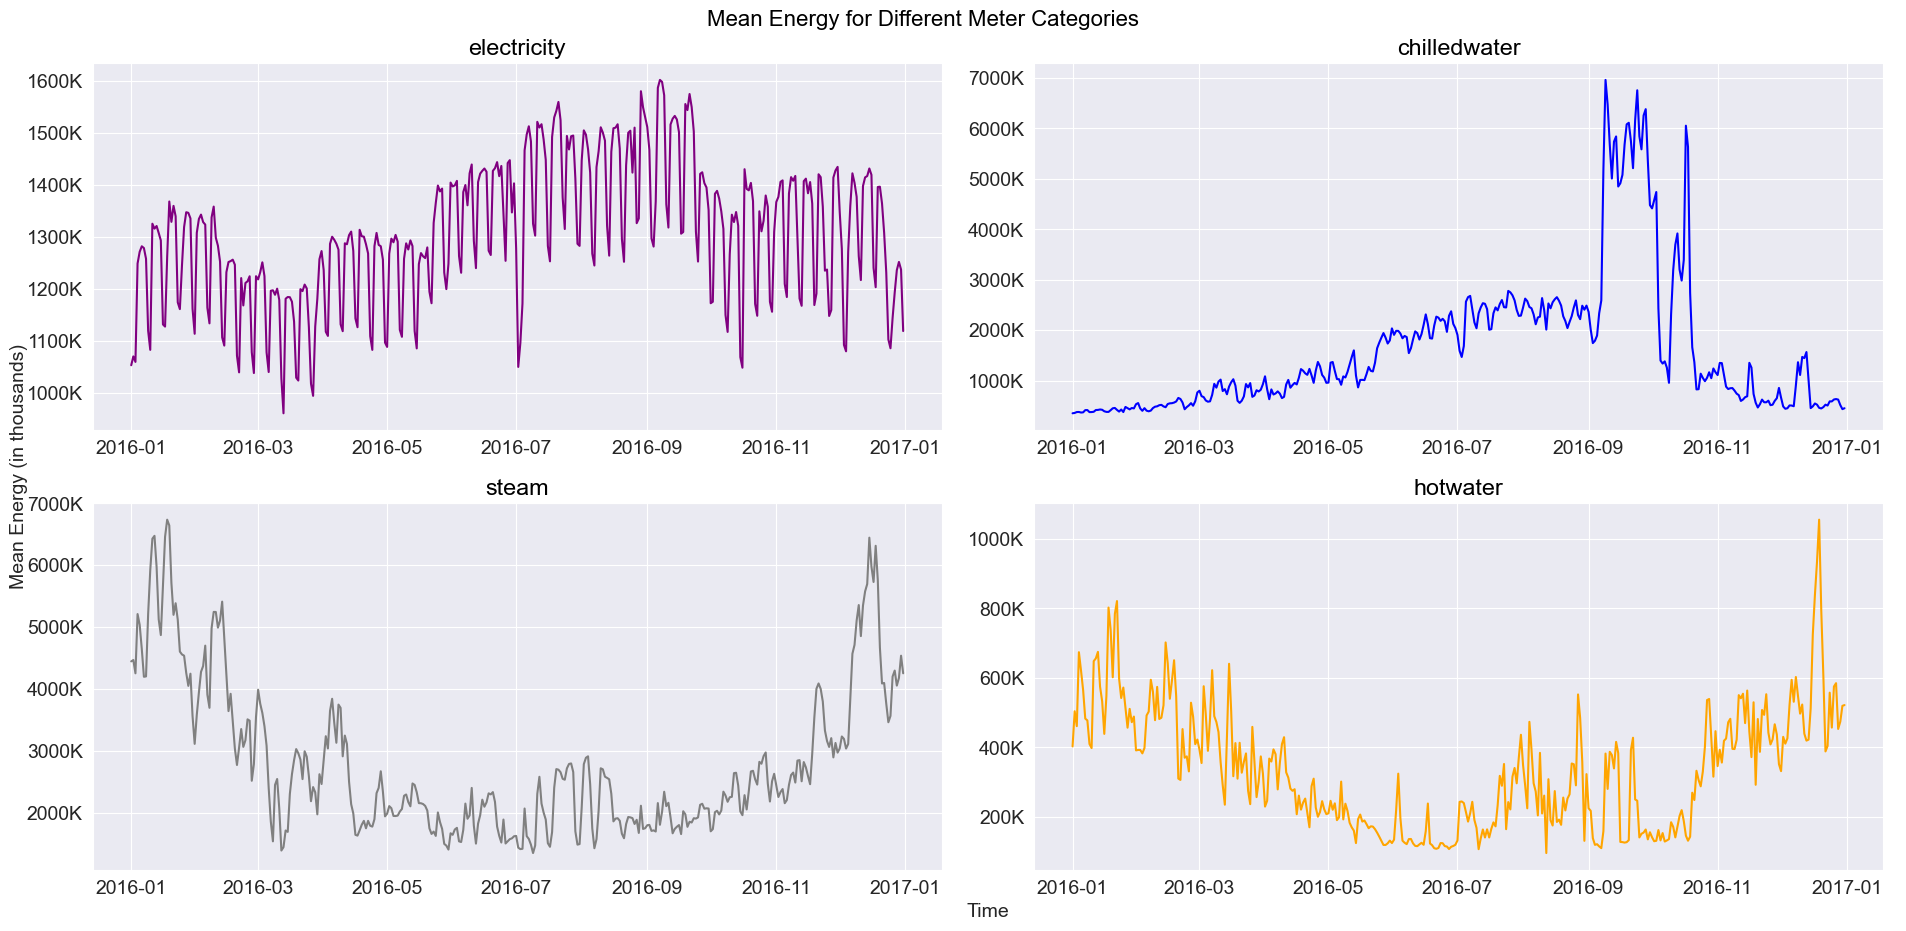

In [115]:
import matplotlib.ticker as ticker
meters = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['purple', 'blue', 'grey', 'orange']

for ax, m in zip(axes.flat, meters):
    filtered_df = df_filtered[df_filtered['meter'] == meters[m]]
    meter_daily = filtered_df.groupby(['meter', filtered_df['timestamp'].dt.date])['meter_reading'].sum()
    meter_daily = meter_daily.reset_index()
    mean = meter_daily.groupby('timestamp')['meter_reading'].mean()
    
    ax.plot(mean.index, mean, color=colors[m])
    ax.set_title(meters[m])
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))  # Format y-axis labels in thousands


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time')
plt.ylabel('Mean Energy (in thousands)', labelpad=20)

plt.suptitle('Mean Energy for Different Meter Categories', fontsize=16, y=0.96)
plt.tight_layout()
plt.show()

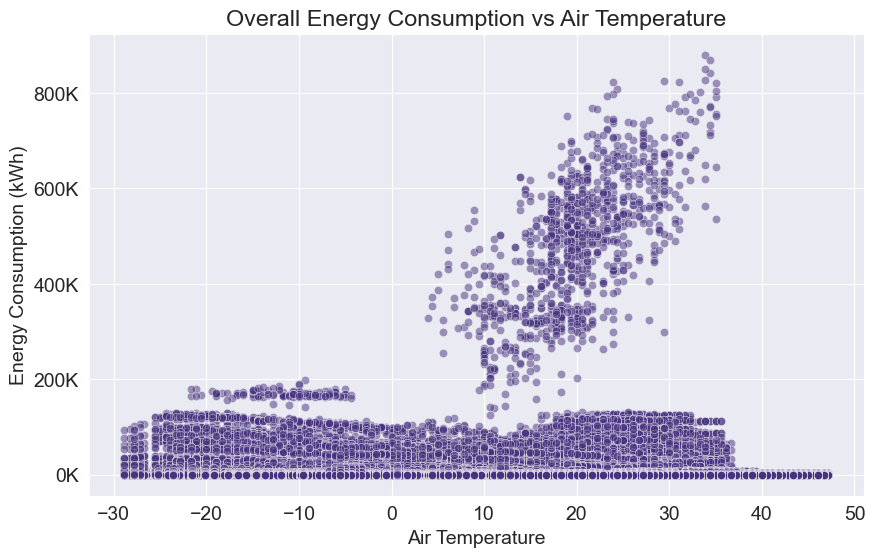

In [117]:

df_subset = df_filtered[['air_temperature', 'meter_reading']]


sns.set_style('darkgrid')
sns.set_palette('viridis')


fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_subset, x='air_temperature', y='meter_reading', alpha=0.5, ax=ax)
ax.set_xlabel('Air Temperature')
ax.set_ylabel('Energy Consumption (kWh)')
ax.set_title('Overall Energy Consumption vs Air Temperature')


formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K')
ax.yaxis.set_major_formatter(formatter)


plt.show()


As observed there is a hike in energy consumption as the temperature increases which would require either air conditioning or let some heavy equipement usage thus the energy consumed also increases

In [118]:
df_filtered.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,wind_direction,wind_speed,building_age
0,0,electricity,2016-01-01,0.0,0,Education,7432,2008-01-01,25.0,6.0,20.0,0.0,0.0,15
1,1,electricity,2016-01-01,0.0,0,Education,2720,2004-01-01,25.0,6.0,20.0,0.0,0.0,19
2,2,electricity,2016-01-01,0.0,0,Education,5376,1991-01-01,25.0,6.0,20.0,0.0,0.0,32
3,3,electricity,2016-01-01,0.0,0,Education,23685,2002-01-01,25.0,6.0,20.0,0.0,0.0,21
4,4,electricity,2016-01-01,0.0,0,Education,-14465,1975-01-01,25.0,6.0,20.0,0.0,0.0,48


**Q7** How does energy consumption looks like for the areas with maximum tempearture ?


In [143]:
df_filtered['air_temperature'].max()

47.2

In [128]:
filtered_df = df_filtered[df_filtered['air_temperature'] == 47.2]
mean_energy_consumption = filtered_df.groupby('building_id')['meter_reading'].mean().reset_index()
mean_energy_consumption

,building_id,meter_reading
0,156,160.955002
1,157,72.777496
2,158,15.302500
3,159,21.090000
4,160,16.197500
...,...,...
130,286,57.082138
131,287,12.869958
132,288,33.857498
133,289,12.855000


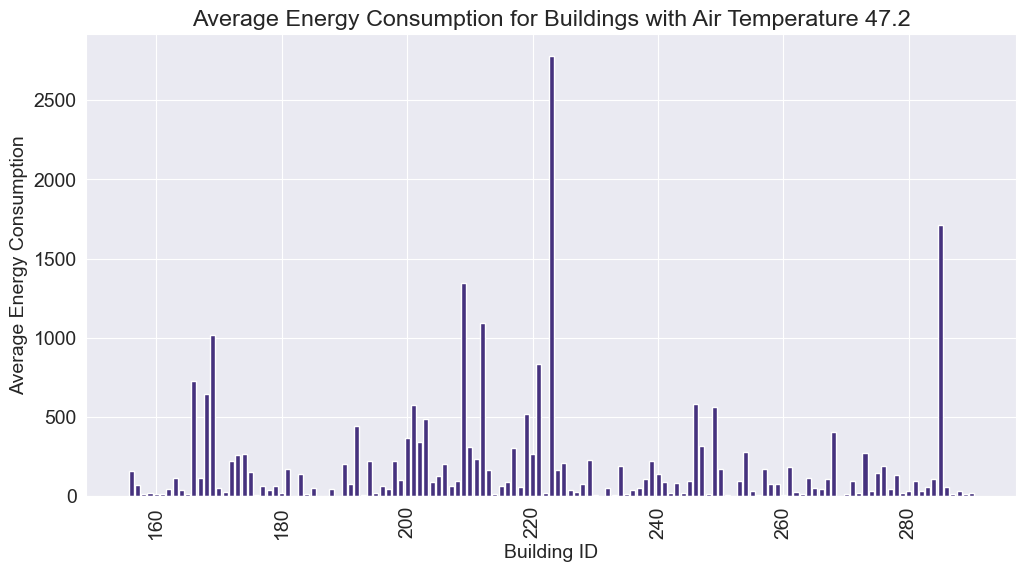

Building ID with Maximum Average Energy Consumption: 223


In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows with air temperature 47.2
filtered_df = df_filtered[df_filtered['air_temperature'] == 47.2]

# Calculate the average energy consumed for the buildings
average_energy_consumption = filtered_df.groupby('building_id')['meter_reading'].mean().reset_index()
max_energy_building_id = average_energy_consumption.loc[average_energy_consumption['meter_reading'].idxmax(), 'building_id']

# Create a bar plot of the average energy consumption
plt.figure(figsize=(12, 6))
plt.bar(average_energy_consumption['building_id'], average_energy_consumption['meter_reading'])
plt.xlabel('Building ID')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption for Buildings with Air Temperature 47.2')
plt.xticks(rotation=90)
plt.show()
print('Building ID with Maximum Average Energy Consumption:', max_energy_building_id)

In [140]:
df_filtered[df_filtered['building_id'] == 223].sample(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,wind_direction,wind_speed,building_age
4332081,223,electricity,2016-03-23 09:00:00,2324.199951,2,Education,-956,1969-01-01,15.601562,2.0,-1.700195,220.0,2.599609,54
19227098,223,electricity,2016-12-14 13:00:00,2350.689941,2,Education,-956,1969-01-01,11.703125,-1.0,5.601562,120.0,2.099609,54
19958862,223,electricity,2016-12-27 11:00:00,2117.979980,2,Education,-956,1969-01-01,7.800781,2.0,1.700195,0.0,0.000000,54
1704550,223,electricity,2016-01-31 22:00:00,2253.429932,2,Education,-956,1969-01-01,23.296875,-1.0,0.000000,170.0,2.099609,54
11445544,223,electricity,2016-07-28 13:00:00,3112.389893,2,Education,-956,1969-01-01,31.703125,4.0,16.703125,120.0,2.599609,54


As we can observe that the building_id 223 is used for **Education** and the building is also **54** years old hence due to the average temperature reaching upto 47&#xb0;C 

**Q7** How is the Time series profile and Energy consumption for different categories in primary_use

In [146]:
df['primary_use'].nunique()

16

Since there are 16 catgories we must be able to see how their Energy consumption vary throughout the year

**Note :** Also it is to be noted that we will use the values of education from df_filtered as we removed the outlier values for building_id 1099 and 740

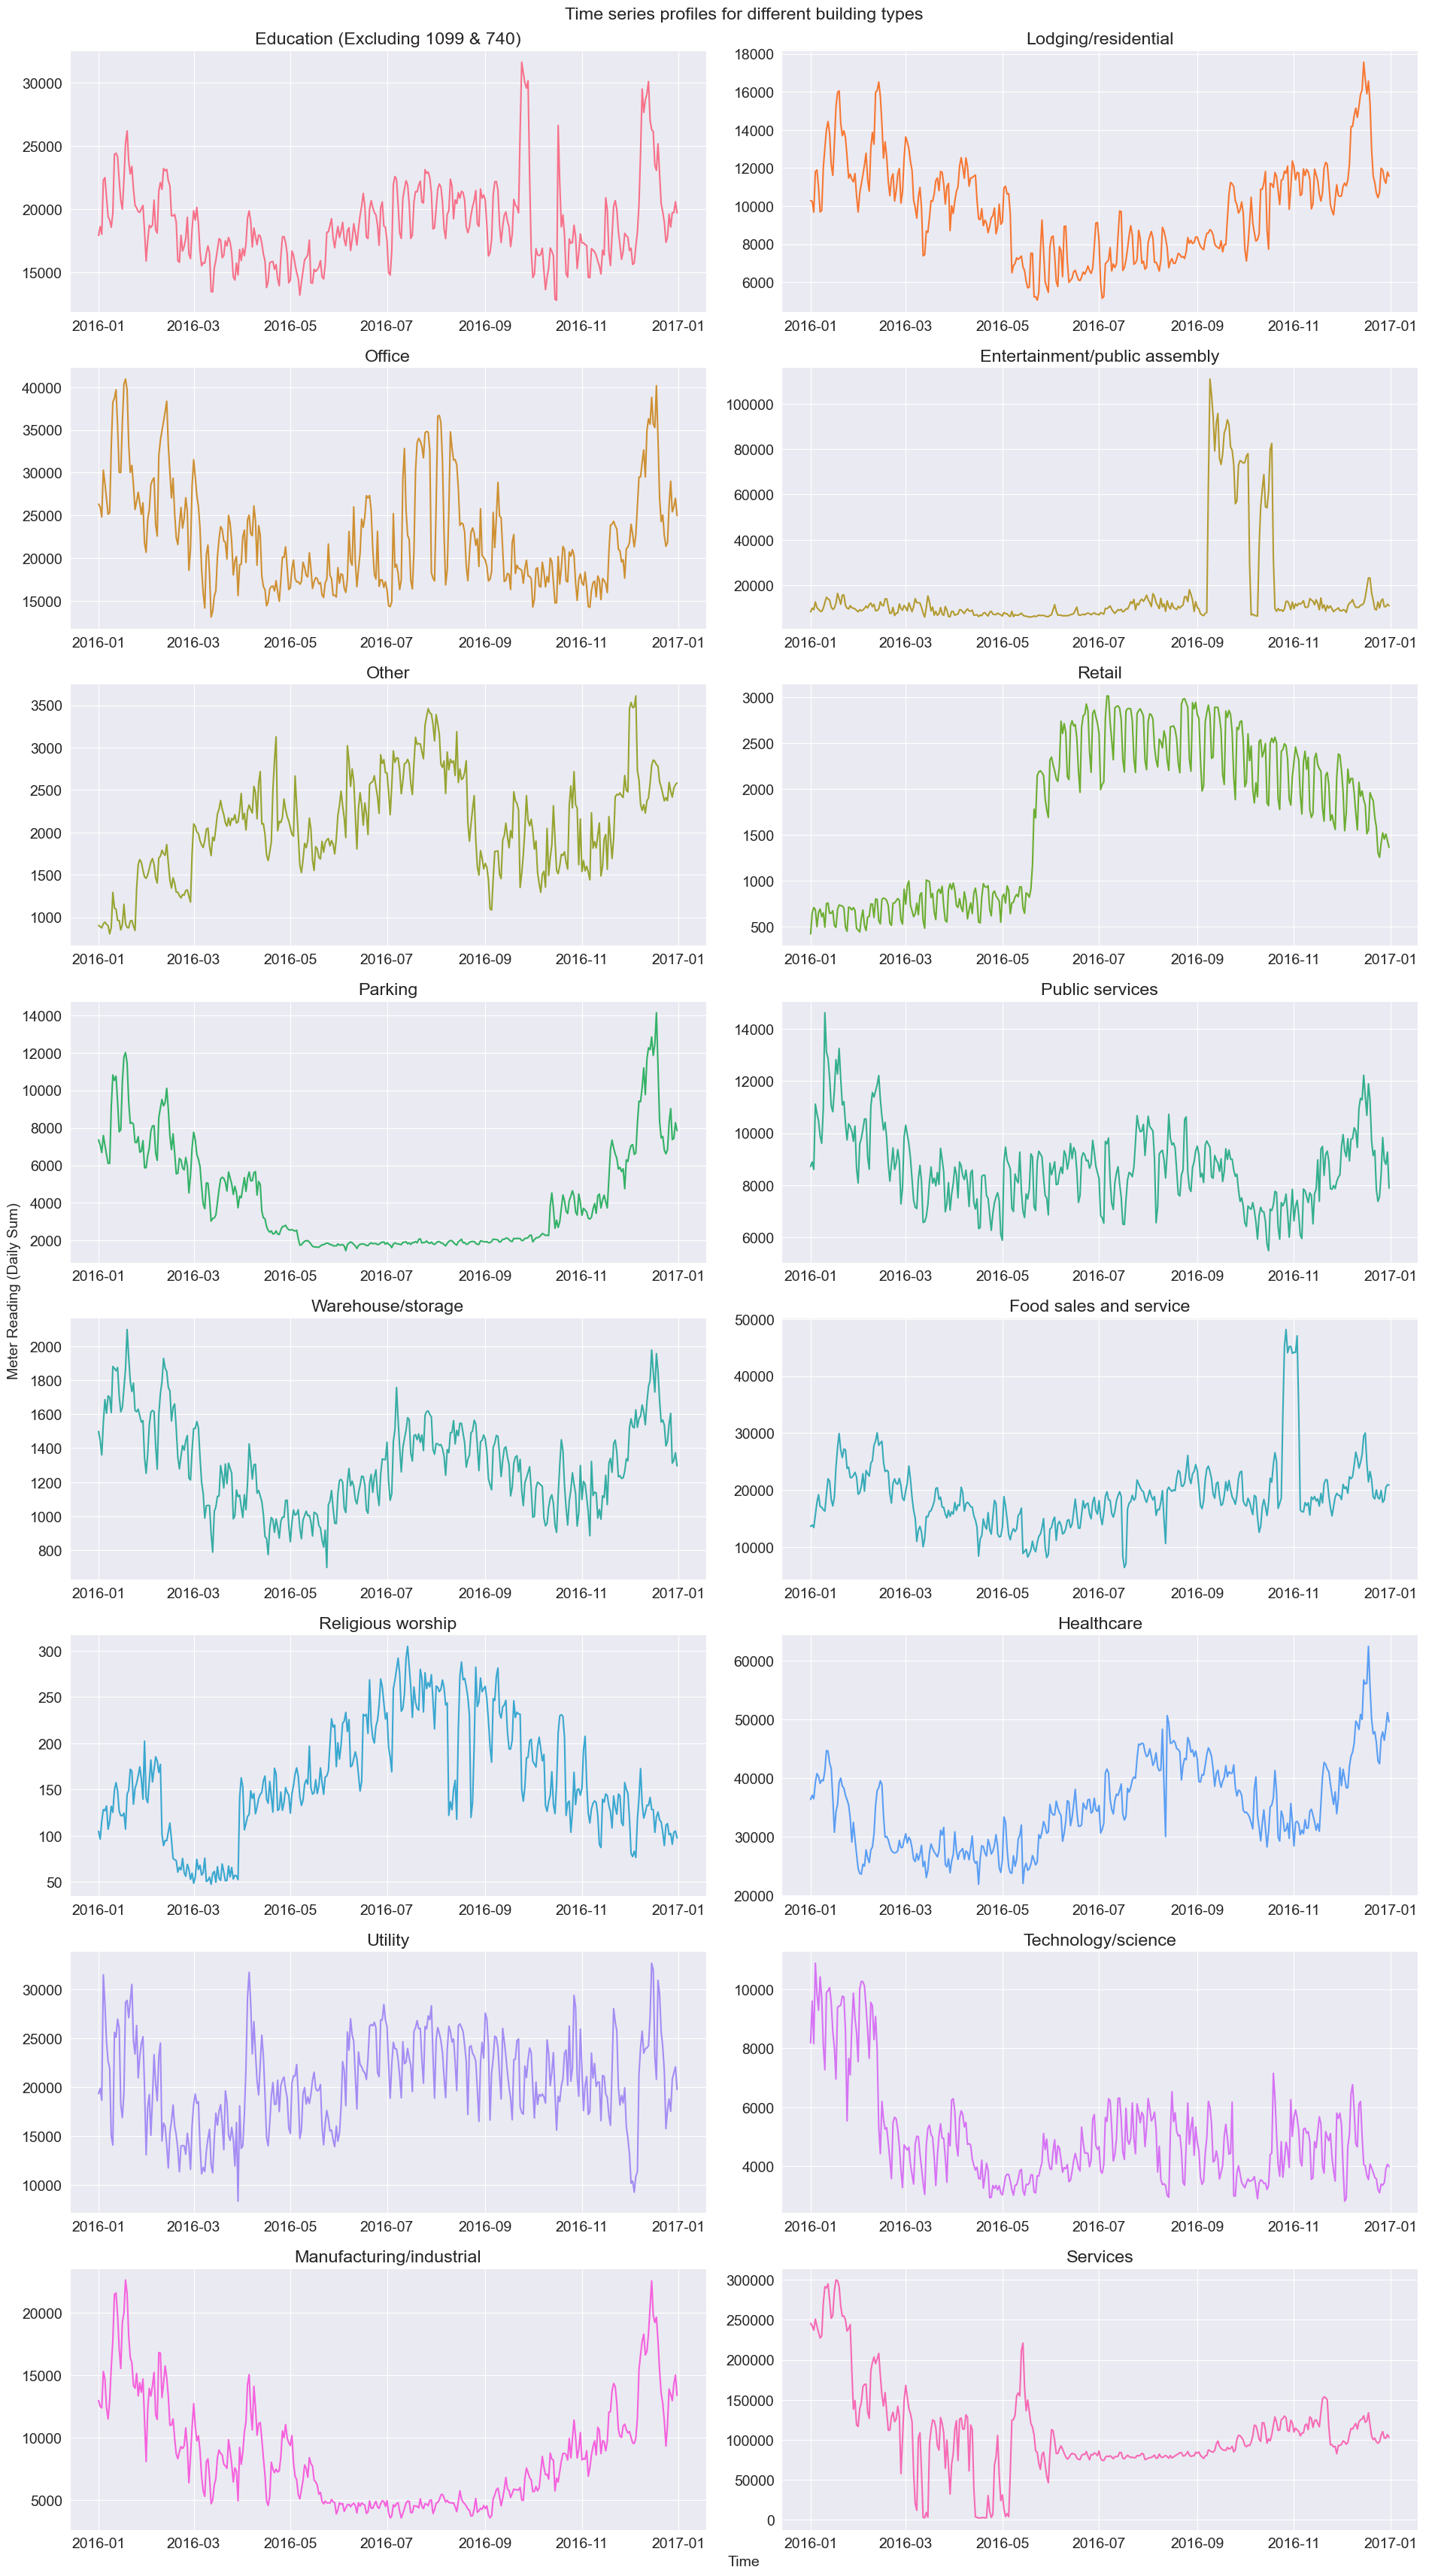

In [147]:

colors = sns.color_palette('husl', len(df['primary_use'].unique()))

fig, axes = plt.subplots(8, 2, figsize=(20, 35))

edu_df = df_filtered[(df_filtered['primary_use'] == 'Education') & (df_filtered['building_id'] != 740) & (df_filtered['building_id'] != 1099)]
edu_daily = edu_df.groupby(['building_id', edu_df['timestamp'].dt.date])['meter_reading'].sum()
edu_daily = edu_daily.reset_index()
edu_mean = edu_daily.groupby('timestamp')['meter_reading'].mean()
axes[0, 0].plot(edu_mean.index, edu_mean, color=colors[0])
axes[0, 0].set_title('Education (Excluding 1099 & 740)')

for ax, primary_use, color in zip(axes.flat[1:], df['primary_use'].unique()[1:], colors[1:]):
    use_df = df[df['primary_use'] == primary_use]
    use_daily = use_df.groupby(['building_id', use_df['timestamp'].dt.date])['meter_reading'].sum()
    use_daily = use_daily.reset_index()
    use_mean = use_daily.groupby('timestamp')['meter_reading'].mean()

    ax.plot(use_mean.index, use_mean, color=color)
    ax.set_title(primary_use)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time')
plt.ylabel('Meter Reading (Daily Sum)', labelpad=20)
plt.title('Time series profiles for different building types', pad=30)

plt.tight_layout()
plt.show()


From the visualization above we can observe the following things:

-   The Energy consumption for "Education" is low during the months between Match to July as it can be a vacation for the school students
-   The Energy consumption for "Entertainment/Public assembly" is high during the end of the year as it is festive season like chirstmas and new year 
-   The Energy consumption for "Lodging" is low during the middle of the year as no one travels much during the middle of the year when compared to the rest of the year.   

Let us save and upload our work to Jovian before continuing

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'